### Group Members:
- Aditya Varun V (AI22BTECH11001)
- Surya Saketh Chakka (AI22BTECH11005)
- Saketh Ram Kumar Dondapati (AI22BTECH11023)

## Web Scraping

In [1]:
!pip install brotli

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install requests
!pip install beautifulsoup4

In [3]:
import requests
from bs4 import BeautifulSoup as bs

In [4]:
# Scraping the unesco domain
URL = "https://whc.unesco.org/en/list/"

response = requests.get(URL)
if response.status_code == 200:
    print("Successfully fetched webpage!")
else:
    print("Failed to fetch the webpage. Status code:", response.status_code)

Successfully fetched webpage!


In [5]:
# Creating the soup object

soup = bs(response.content, 'html.parser')

In [6]:
# Extracting the links for all the heritage sites

div_links = soup.find_all("div",attrs = {"class":"list_site"})
links = []
for div_link in div_links:
  links.append(div_link.find_all("a"))
links_cleaned = set()
for sub_links in links:
  for link in sub_links:
    if link['href'].startswith('/en/list'):
      links_cleaned.add(link["href"])


In [16]:
# Testing the first link

response = requests.get("https://whc.unesco.org"+list(links_cleaned)[0])
soup = bs(response.content, 'html.parser')
title = soup.find('title').get_text(strip=True) if soup.find('title') else "No Title"
url = "https://whc.unesco.org"+list(links_cleaned)[0]
print(url)
content = soup.find("div", attrs = {"class":"col-12 col-lg-8 mb-4 mb-lg-0"})
description = content.find('div',attrs = {'class':'rich-text'})
description.text
paragraph = content.find('div', attrs = {'class':'border-top pt-4 mt-4'})
paragraph.text

https://whc.unesco.org/en/list/1007


'\nOutstanding Universal Value\nBrief synthesis\nThe Cape Floral Region has been recognised as one of the most special places for plants in the world in terms of diversity, density and number of endemic species. The property is a highly distinctive phytogeographic unit which is regarded as one of the six Floral Kingdoms of the world and is by far the smallest and relatively the most diverse. It is recognised as one of the world’s ʻhottest hotspotsʼ for its diversity of endemic and threatened plants, and contains outstanding examples of significant ongoing ecological, biological and evolutionary processes. This extraordinary assemblage of plant life and its associated fauna is represented by a series of 13 protected area clusters covering an area of more than 1 million ha. These protected areas also conserve the outstanding ecological, biological and evolutionary processes associated with the beautiful and distinctive Fynbos vegetation, unique to the Cape Floral Region.\nCriterion (ix):

In [18]:
# Adding the data from the first link to the files

# File 2: title, url, and Description
with open("/Users/sakethchakka/Desktop/title_url_description.txt", "w") as file1:
    file1.write(f"Title: {title}\n")
    file1.write(f"URL: {url}\n")
    file1.write(f"Description:\n{description.text}\n")

# File 2: title, url, and Paragraph
with open("/Users/sakethchakka/Desktop/title_url_paragraph.txt", "w") as file2:
    file2.write(f"Title: {title}\n")
    file2.write(f"URL: {url}\n")
    file2.write(f"Paragraph:\n{paragraph.text}\n")

In [22]:
# Adding the data from all the links to the files

for link in list(links_cleaned):
    response = requests.get("https://whc.unesco.org"+link)
    soup = bs(response.content, 'html.parser')
    title = soup.find('title').get_text(strip=True) if soup.find('title') else "No Title"
    url = "https://whc.unesco.org"+link
    print(url)
    content = soup.find("div", attrs = {"class":"col-12 col-lg-8 mb-4 mb-lg-0"})
    description = (content.find('div',attrs = {'class':'rich-text'}).text if content and content.find('div', attrs={'class': 'rich-text'})
        else "No Description")
    paragraph = (content.find('div', attrs = {'class':'border-top pt-4 mt-4'}).text if content and content.find('div', attrs={'class': 'border-top pt-4 mt-4'})
        else "No Paragraph")
    with open("/Users/sakethchakka/Desktop/title_url_description.txt", "a") as file1:
        file1.write(f"Title: {title}\n")
        file1.write(f"URL: {url}\n")
        file1.write(f"Description:\n{description}\n")
        file1.write("-" * 80 + "\n")

    with open("/Users/sakethchakka/Desktop/title_url_paragraph.txt", "a") as file2:
        file2.write(f"Title: {title}\n")
        file2.write(f"URL: {url}\n")
        file2.write(f"Paragraph:\n{paragraph}\n")
        file2.write("-" * 80 + "\n")
        

https://whc.unesco.org/en/list/1007
https://whc.unesco.org/en/list/4
https://whc.unesco.org/en/list/970
https://whc.unesco.org/en/list/10
https://whc.unesco.org/en/list/722
https://whc.unesco.org/en/list/1226
https://whc.unesco.org/en/list/827
https://whc.unesco.org/en/list/1185
https://whc.unesco.org/en/list/147
https://whc.unesco.org/en/list/1028
https://whc.unesco.org/en/list/1604
https://whc.unesco.org/en/list/677
https://whc.unesco.org/en/list/982
https://whc.unesco.org/en/list/835
https://whc.unesco.org/en/list/499
https://whc.unesco.org/en/list/1669
https://whc.unesco.org/en/list/1022
https://whc.unesco.org/en/list/1280
https://whc.unesco.org/en/list/1542
https://whc.unesco.org/en/list/1606
https://whc.unesco.org/en/list/1375
https://whc.unesco.org/en/list/358
https://whc.unesco.org/en/list/629
https://whc.unesco.org/en/list/1134
https://whc.unesco.org/en/list/425
https://whc.unesco.org/en/list/822
https://whc.unesco.org/en/list/206
https://whc.unesco.org/en/list/893
https://whc

https://whc.unesco.org/en/list/787
https://whc.unesco.org/en/list/138
https://whc.unesco.org/en/list/757
https://whc.unesco.org/en/list/555
https://whc.unesco.org/en/list/733
https://whc.unesco.org/en/list/192
https://whc.unesco.org/en/list/1657
https://whc.unesco.org/en/list/690
https://whc.unesco.org/en/list/1372
https://whc.unesco.org/en/list/483
https://whc.unesco.org/en/list/708
https://whc.unesco.org/en/list/1708
https://whc.unesco.org/en/list/1342
https://whc.unesco.org/en/list/631
https://whc.unesco.org/en/list/1541
https://whc.unesco.org/en/list/86
https://whc.unesco.org/en/list/1282
https://whc.unesco.org/en/list/1528
https://whc.unesco.org/en/list/1608
https://whc.unesco.org/en/list/1456
https://whc.unesco.org/en/list/258
https://whc.unesco.org/en/list/736
https://whc.unesco.org/en/list/1376
https://whc.unesco.org/en/list/321
https://whc.unesco.org/en/list/1137
https://whc.unesco.org/en/list/573
https://whc.unesco.org/en/list/1501
https://whc.unesco.org/en/list/414
https://w

https://whc.unesco.org/en/list/561
https://whc.unesco.org/en/list/556
https://whc.unesco.org/en/list/2
https://whc.unesco.org/en/list/1442
https://whc.unesco.org/en/list/948
https://whc.unesco.org/en/list/171
https://whc.unesco.org/en/list/603
https://whc.unesco.org/en/list/1220
https://whc.unesco.org/en/list/753
https://whc.unesco.org/en/list/1116
https://whc.unesco.org/en/list/1549
https://whc.unesco.org/en/list/233
https://whc.unesco.org/en/list/1397
https://whc.unesco.org/en/list/17
https://whc.unesco.org/en/list/532
https://whc.unesco.org/en/list/699
https://whc.unesco.org/en/list/1004
https://whc.unesco.org/en/list/1026
https://whc.unesco.org/en/list/22
https://whc.unesco.org/en/list/387
https://whc.unesco.org/en/list/1113
https://whc.unesco.org/en/list/1665
https://whc.unesco.org/en/list/205
https://whc.unesco.org/en/list/1509
https://whc.unesco.org/en/list/1011
https://whc.unesco.org/en/list/407
https://whc.unesco.org/en/list/954
https://whc.unesco.org/en/list/278
https://whc.u

https://whc.unesco.org/en/list/998
https://whc.unesco.org/en/list/439
https://whc.unesco.org/en/list/696
https://whc.unesco.org/en/list/776
https://whc.unesco.org/en/list/1245
https://whc.unesco.org/en/list/1106
https://whc.unesco.org/en/list/968
https://whc.unesco.org/en/list/1053
https://whc.unesco.org/en/list/416
https://whc.unesco.org/en/list/1242
https://whc.unesco.org/en/list/505
https://whc.unesco.org/en/list/977
https://whc.unesco.org/en/list/1415
https://whc.unesco.org/en/list/1348
https://whc.unesco.org/en/list/1622
https://whc.unesco.org/en/list/833
https://whc.unesco.org/en/list/885
https://whc.unesco.org/en/list/403
https://whc.unesco.org/en/list/740
https://whc.unesco.org/en/list/1660
https://whc.unesco.org/en/list/88
https://whc.unesco.org/en/list/564
https://whc.unesco.org/en/list/492
https://whc.unesco.org/en/list/837
https://whc.unesco.org/en/list/64
https://whc.unesco.org/en/list/454
https://whc.unesco.org/en/list/1188
https://whc.unesco.org/en/list/144
https://whc.u

https://whc.unesco.org/en/list/558
https://whc.unesco.org/en/list/335
https://whc.unesco.org/en/list/1142
https://whc.unesco.org/en/list/1313
https://whc.unesco.org/en/list/312
https://whc.unesco.org/en/list/984
https://whc.unesco.org/en/list/950
https://whc.unesco.org/en/list/1262
https://whc.unesco.org/en/list/638
https://whc.unesco.org/en/list/1100
https://whc.unesco.org/en/list/1225
https://whc.unesco.org/en/list/848
https://whc.unesco.org/en/list/597
https://whc.unesco.org/en/list/625
https://whc.unesco.org/en/list/1550
https://whc.unesco.org/en/list/911
https://whc.unesco.org/en/list/1631
https://whc.unesco.org/en/list/13
https://whc.unesco.org/en/list/1213
https://whc.unesco.org/en/list/592
https://whc.unesco.org/en/list/913
https://whc.unesco.org/en/list/1356
https://whc.unesco.org/en/list/381
https://whc.unesco.org/en/list/1346
https://whc.unesco.org/en/list/250
https://whc.unesco.org/en/list/1083
https://whc.unesco.org/en/list/1029
https://whc.unesco.org/en/list/672
https://w

https://whc.unesco.org/en/list/1345
https://whc.unesco.org/en/list/1518
https://whc.unesco.org/en/list/630
https://whc.unesco.org/en/list/1565
https://whc.unesco.org/en/list/191
https://whc.unesco.org/en/list/1269
https://whc.unesco.org/en/list/496
https://whc.unesco.org/en/list/316
https://whc.unesco.org/en/list/887
https://whc.unesco.org/en/list/373
https://whc.unesco.org/en/list/244
https://whc.unesco.org/en/list/886
https://whc.unesco.org/en/list/377
https://whc.unesco.org/en/list/392
https://whc.unesco.org/en/list/164
https://whc.unesco.org/en/list/1510
https://whc.unesco.org/en/list/1599
https://whc.unesco.org/en/list/1723
https://whc.unesco.org/en/list/747
https://whc.unesco.org/en/list/1308
https://whc.unesco.org/en/list/359
https://whc.unesco.org/en/list/340
https://whc.unesco.org/en/list/516
https://whc.unesco.org/en/list/1463
https://whc.unesco.org/en/list/1680
https://whc.unesco.org/en/list/1540
https://whc.unesco.org/en/list/30
https://whc.unesco.org/en/list/255
https://wh

In [23]:
len(links_cleaned)

1226

## Data Cleaning and Preprocessing

In [4]:
# Importing and parsing the stored data

import re

# Function to parse the text file and return the title, url, and paragraph
def parse_data(file_path, num_documents=3000):
    data = []
    with open(file_path, 'r') as file:
        content = file.read()
        entries = content.split('-' * 80)
        
        for entry in entries:
            if entry.strip():
                title_match = re.search(r'Title: (.+)', entry)
                url_match = re.search(r'URL: (.+)', entry)
                paragraph_match = re.search(r'Paragraph:\n(.+)', entry, re.DOTALL)
                
                title = title_match.group(1).strip() if title_match else "No Title"
                url = url_match.group(1).strip() if url_match else "No URL"
                paragraph = paragraph_match.group(1).strip() if paragraph_match else "No Paragraph"
                
                data.append([title, url, paragraph])
                
            if(len(data) == num_documents):
                break
    return data

file_path = "title_url_paragraph.txt"

data = parse_data(file_path)

for entry in data:
    print(entry)
    break

print("length of parsed data:", len(data))

['Cape Floral Region Protected Areas - UNESCO World Heritage Centre', 'https://whc.unesco.org/en/list/1007', 'Outstanding Universal Value\nBrief synthesis\nThe Cape Floral Region has been recognised as one of the most special places for plants in the world in terms of diversity, density and number of endemic species. The property is a highly distinctive phytogeographic unit which is regarded as one of the six Floral Kingdoms of the world and is by far the smallest and relatively the most diverse. It is recognised as one of the world’s ʻhottest hotspotsʼ for its diversity of endemic and threatened plants, and contains outstanding examples of significant ongoing ecological, biological and evolutionary processes. This extraordinary assemblage of plant life and its associated fauna is represented by a series of 13 protected area clusters covering an area of more than 1 million ha. These protected areas also conserve the outstanding ecological, biological and evolutionary processes associat

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [6]:
# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/aviator98/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aviator98/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/aviator98/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Initialize tools
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

print(len(stop_words))

179


In [14]:
# Function to preprocess the text: remove special characters and stop words, sentence and word tokenize

def preprocess_text(text):
    # Keeping full stops for sentence tokenization
    text = re.sub(r'[^a-zA-Z\s.]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', text).strip()

    sentences = sent_tokenize(cleaned_text)
    
    # Removing fullstops for sentence tokenization
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
    
    words = word_tokenize(cleaned_text)

    filtered_words = [word for word in words if word.lower() not in stop_words]
    stemmed_words = [ps.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return cleaned_text, sentences, filtered_words, stemmed_words, lemmatized_words

In [15]:
# Preprocessing the documents and storing the preprocessed data in a pickle file for future use

import pickle

processed_data = []

for i in range(len(data)):
    cleaned_text, sentences, filtered_words, stemmed_words, lemmatized_words = preprocess_text(data[i][2])
    
    processed_data.append({
        'title' : data[i][0],
        'url' : data[i][1],
        'cleaned_text': cleaned_text,
        'sentences': sentences,
        'filtered_words': filtered_words,
        'stemmed_words': stemmed_words,
        'lemmatized_words': lemmatized_words
    })

# Save the processed data to a file
with open('processed_data.pkl', 'wb') as file:
    pickle.dump(processed_data, file)

## Exploratory Data Analysis

In [75]:
# Importing the stored data

import pickle

with open('processed_data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

print(len(loaded_data))

1226


In [76]:
# Identifying the documents with low sentence count
threshold = 5

count = 0
for entry in loaded_data:
    if(len(entry['sentences']) < threshold):
        print("Title:", entry['title'])
        print("URL:", entry['url'])
        print(len(entry['sentences']))
        count += 1
        
print("Number of documents with low sentence count:", count)

Title: Virgin Komi Forests - UNESCO World Heritage Centre
URL: https://whc.unesco.org/en/list/719
1
Title: Old City of Dubrovnik - UNESCO World Heritage Centre
URL: https://whc.unesco.org/en/list/95
1
Title: Hegmataneh - UNESCO World Heritage Centre
URL: https://whc.unesco.org/en/list/1716
1
Title: Danube Delta - UNESCO World Heritage Centre
URL: https://whc.unesco.org/en/list/588
1
Title: Funerary and memory sites of the First World War (Western Front) - UNESCO World Heritage Centre
URL: https://whc.unesco.org/en/list/1567
1
Title: Old City of Acre - UNESCO World Heritage Centre
URL: https://whc.unesco.org/en/list/1042
3
Title: Cold Winter Deserts of Turan - UNESCO World Heritage Centre
URL: https://whc.unesco.org/en/list/1693
1
Title: Canaima National Park - UNESCO World Heritage Centre
URL: https://whc.unesco.org/en/list/701
1
Title: Ancient City of Sigiriya - UNESCO World Heritage Centre
URL: https://whc.unesco.org/en/list/202
1
Title: Vat Phou and Associated Ancient Settlements wi

In [77]:
# Displaying the Number of total stemmed words, Average word length, Unique words, and Lexical Diversity

from collections import Counter

tot_word_list = []
c = 0
tot_word_len = 0

for entry in loaded_data:
    for word in entry['stemmed_words']:
        tot_word_list.append(word)
        tot_word_len += len(word)

unique_words = Counter(tot_word_list).keys()
print("Number of total stemmed words :", len(tot_word_list))
print("Average word length =", tot_word_len / len(tot_word_list))
print("Unique words = ", len(unique_words))
print("Lexical Diversity = ", len(unique_words) / len(tot_word_list))

Number of total stemmed words : 721891
Average word length = 6.010291027315758
Unique words =  26096
Lexical Diversity =  0.03614950179459226


In [78]:
# Displaying the Number of total lemmatized words, Average word length, Unique words, and Lexical Diversity

tot_word_list = []
c = 0
tot_word_len = 0
for entry in loaded_data:
    for word in entry['lemmatized_words']:
        tot_word_list.append(word)
        tot_word_len += len(word)
unique_words = Counter(tot_word_list).keys()
print("Number of total lemmatized words :", len(tot_word_list))
print("Average word length =", tot_word_len / len(tot_word_list))
print("Unique words = ", len(unique_words))
print("Lexical Diversity = ", len(unique_words) / len(tot_word_list))

Number of total lemmatized words : 721891
Average word length = 7.260482538222529
Unique words =  36923
Lexical Diversity =  0.05114761092741148


In [79]:
# Displaying the Number of total filtered words, Average word length, Unique words, and Lexical Diversity

tot_word_list = []
c = 0
tot_word_len = 0
for entry in loaded_data:
    for word in entry['filtered_words']:
        tot_word_list.append(word)
        tot_word_len += len(word)
unique_words = Counter(tot_word_list).keys()
print("Number of total filtered words :", len(tot_word_list))
print("Average word length =", tot_word_len / len(tot_word_list))
print("Unique words = ", len(unique_words))
print("Lexical Diversity = ", len(unique_words) / len(tot_word_list))

Number of total filtered words : 721891
Average word length = 7.413235516165183
Unique words =  39645
Lexical Diversity =  0.0549182632835151


In [80]:
# Identifying the number of words per sentence

n_words = 0
n_sentences = 0
for entry in loaded_data:
    n_words += len(entry['filtered_words'])
    n_sentences += len(entry['sentences'])
print("Average words per sentence:", n_words / n_sentences)

Average words per sentence: 15.47959686930417


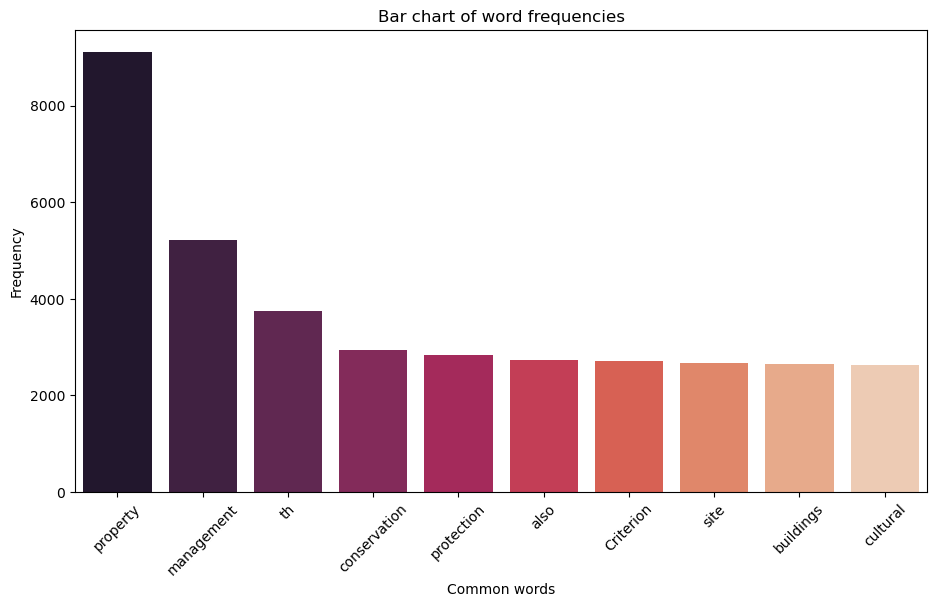

In [83]:
# Identifying the most common words across all the documents

from nltk.probability import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
fdist = FreqDist(tot_word_list)
fdist.most_common(50)

# Plotting the most common words across all the documents
import warnings

# Suppressing hue warnings in sns
warnings.filterwarnings('ignore')

comm_list = fdist.most_common(10)
comm_list = pd.Series(dict(comm_list))
fig, ax = plt.subplots(figsize = (11, 6))
plot_ = sns.barplot(x = comm_list.index, y = comm_list.values, ax = ax, palette = 'rocket')
plot_.set_xlabel('Common words')
plot_.set_ylabel('Frequency')
plot_.set_title('Bar chart of word frequencies')
plt.xticks(rotation = 45)

plt.show()

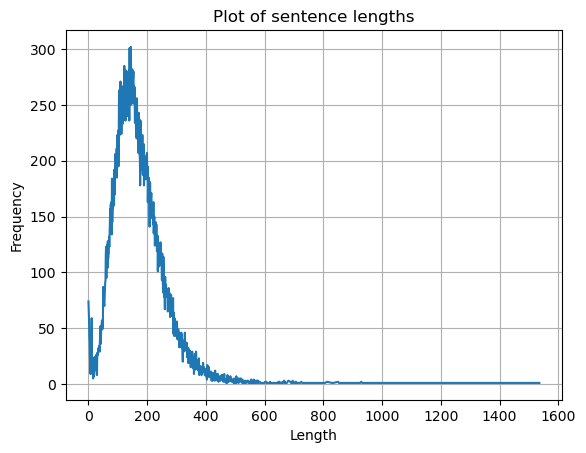

In [84]:
# Identifying the lengths of the different sentences

sentence_lengths = []

for entry in loaded_data:
    for sentence in entry['sentences']:
        sentence_lengths.append(len(sentence))
lendist = FreqDist(sentence_lengths)

# Creating a frequency plot of the sentence lengths

lendist = pd.Series(dict(lendist))
lendist = lendist.sort_index()

plt.plot(lendist.index, lendist.values)
plt.title('Plot of sentence lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.grid()
plt.show()

monument       439
caves          295
park           766
islands        401
rainforests     48
lakes          206
mountains      275
church         531
temple         333
reserve        164
monastery      214
ruins          248
dtype: int64


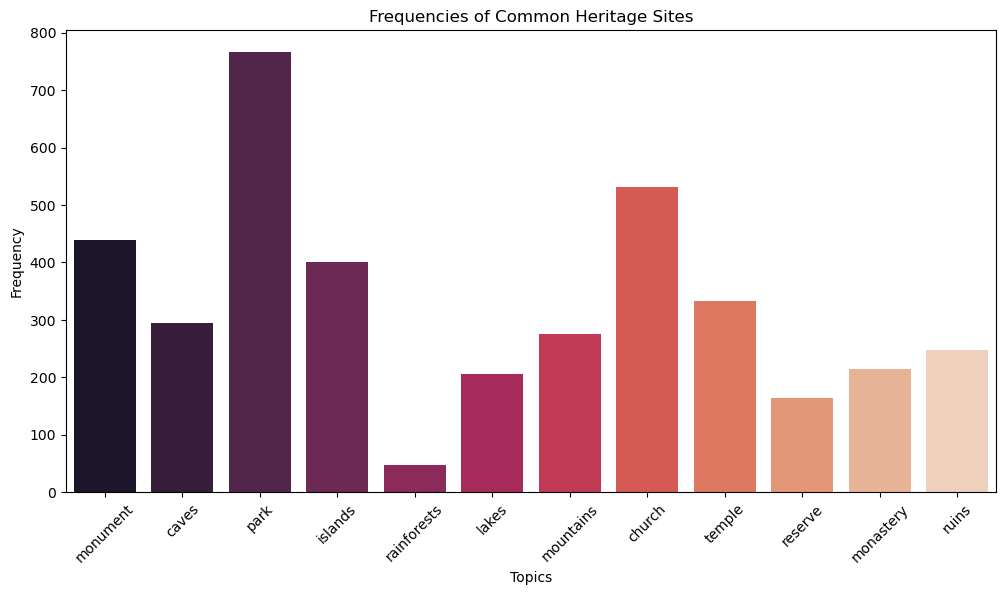

In [85]:
# Identifying the most commonly mentioned heritage sites across all the documents

all_list = pd.Series(dict(fdist))

topics = [
    'monument',
    'caves',
    'park',
    'islands',
    'rainforests',
    'lakes',
    'mountains',
    'church',
    'temple',
    'reserve',
    'monastery',
    'ruins'
]

print(all_list[topics])


# Suppressing hue warnings in sns
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize = (12, 6))
plot_ = sns.barplot(x = topics, y = all_list[topics], ax = ax, palette = 'rocket')
plot_.set_xlabel('Topics')
plot_.set_ylabel('Frequency')
plot_.set_title('Frequencies of Common Heritage Sites')
plt.xticks(rotation = 45)
plt.show()

Antarctica      8
Africa        246
Asia          286
Europe        555
America       202
Australia      66
dtype: int64


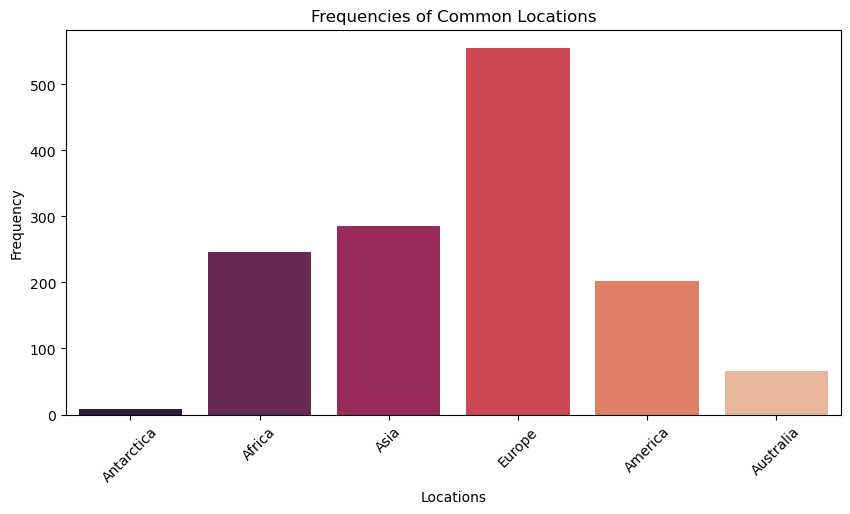

In [86]:
# Identifying the mentions of the different continents across all the documents

locations = [
    'Antarctica',
    'Africa',
    'Asia',
    'Europe',
    'America',
    'Australia'
]

print(all_list[locations])

plt.figure(figsize = (10, 5))
plot_ = sns.barplot(x = locations, y = all_list[locations], palette = 'rocket')
plot_.set_xlabel('Locations')
plot_.set_ylabel('Frequency')
plot_.set_title('Frequencies of Common Locations')
plt.xticks(rotation = 45)
plt.show()

Modern       63
Ancient     244
Medieval     36
BC          283
AD          321
dtype: int64


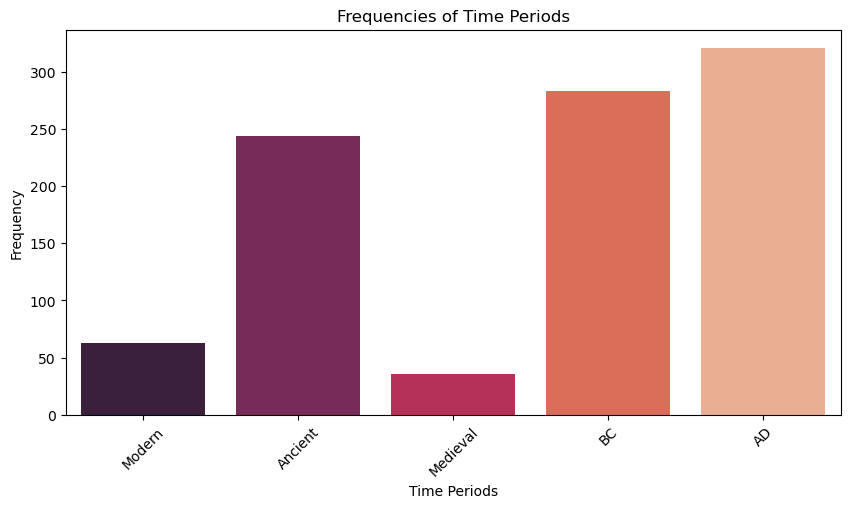

In [87]:
# Identifying the mentions of the different time periods across all the documents

time_period = [
    'Modern',
    'Ancient',
    'Medieval',
    'BC',
    'AD'
]

print(all_list[time_period])

plt.figure(figsize = (10, 5))
plot_ = sns.barplot(x = time_period, y = all_list[time_period], palette = 'rocket')
plot_.set_xlabel('Time Periods')
plot_.set_ylabel('Frequency')
plot_.set_title('Frequencies of Time Periods')
plt.xticks(rotation = 45)
plt.show()

India          211
China          317
USA              4
UK              32
France          77
Italy           79
Germany         76
Japan           94
Russia          52
Brazil          49
Australia       66
Canada          51
Spain          108
Mexico          89
Argentina       37
Netherlands     29
Switzerland     13
Sweden          37
dtype: int64


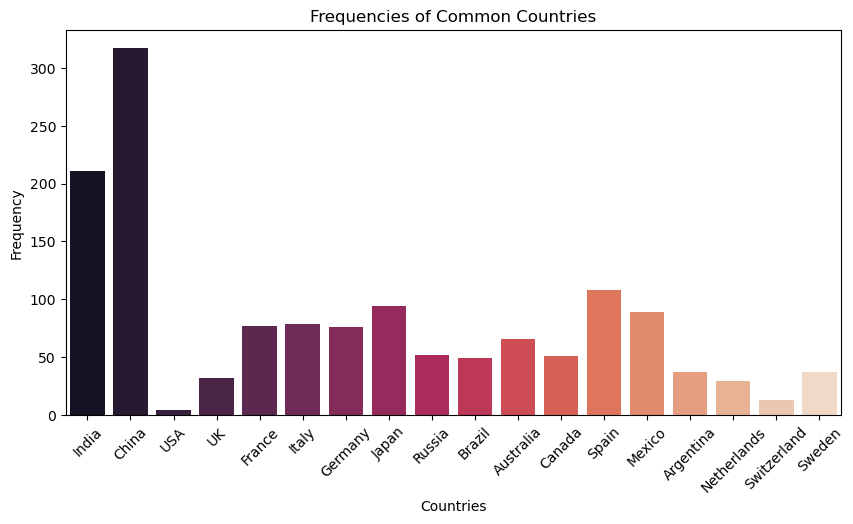

In [88]:
# Identifying the mentions of the different countries across all the documents

countries = [
    'India',
    'China',
    'USA',
    'UK',
    'France',
    'Italy',
    'Germany',
    'Japan',
    'Russia',
    'Brazil',
    'Australia',
    'Canada',
    'Spain',
    'Mexico',
    'Argentina',
    'Netherlands',
    'Switzerland',
    'Sweden'
]

print(all_list[countries])

plt.figure(figsize = (10, 5))
plot_ = sns.barplot(x = countries, y = all_list[countries], palette = 'rocket')
plot_.set_xlabel('Countries')
plot_.set_ylabel('Frequency')
plot_.set_title('Frequencies of Common Countries')
plt.xticks(rotation = 45)
plt.show()

## Credits and References:
- https://whc.unesco.org/
- web_scraping_tutorial.ipynb